# Linear Regression Model with Regularization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

In [3]:
#loading data
data=pd.read_csv('C:\\NYC_trip.csv')
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
data.pickup_datetime=pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime=pd.to_datetime(data.dropoff_datetime)
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [5]:
data['Pickup_day']=data.pickup_datetime.dt.dayofweek
data['Dropoff_day']=data.dropoff_datetime.dt.dayofweek
data['Pickup_hour']=data.pickup_datetime.dt.hour
data['Dropoff_hour']=data.dropoff_datetime.dt.hour
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_day,Dropoff_day,Pickup_hour,Dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,0,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,4,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,6,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,1,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,2,6,6


In [6]:
data.shape

(729322, 15)

In [7]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
Pickup_day            0
Dropoff_day           0
Pickup_hour           0
Dropoff_hour          0
dtype: int64

In [8]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
Pickup_day                     int64
Dropoff_day                    int64
Pickup_hour                    int64
Dropoff_hour                   int64
dtype: object

In [9]:
#changing datatypes
data['store_and_fwd_flag']=1*(data.store_and_fwd_flag.values=='Y')

In [10]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int32
trip_duration                  int64
Pickup_day                     int64
Dropoff_day                    int64
Pickup_hour                    int64
Dropoff_hour                   int64
dtype: object

In [11]:
#segeragating variables
x=data.drop(['trip_duration', 'id', 'pickup_datetime', 'dropoff_datetime'], axis=1)    #independent variable 
y=data['trip_duration']                                           #dependent variable

In [12]:
#seperating train and test data
trainx, testx, trainy, testy = tts(x, y, random_state=56)

In [13]:
lr=LR()              #create instance
lr.fit(trainx, trainy)    #fitting data


LinearRegression()

In [14]:
#prediction over train dataset
train_prediction=lr.predict(trainx)
k=mae(train_prediction, trainy)
print("train prediction mean absoulute error",k)
print("Train prediction R2_score", r2(train_prediction, trainy))

train prediction mean absoulute error 603.9268434646589
Train prediction R2_score -282.39509101772563


In [15]:
#prediction over test dataset
test_prediction=lr.predict(testx)
k=mae(test_prediction, testy)
print("test prediction mean absolute error", k)
print("Test prediction R2_score", r2(test_prediction, testy))

test prediction mean absolute error 597.4548441988155
Test prediction R2_score -214.0660821960234


Text(0.5, 1.0, 'Coefficient Plot')

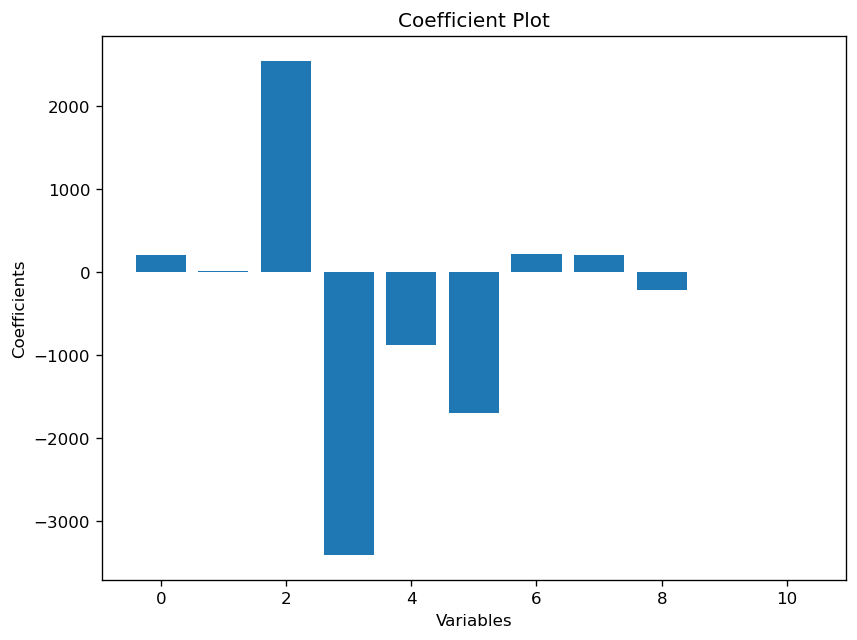

In [16]:
#Coefficient of all the parameter used in prediction
lr.coef_
#plotting the coefficient
plt.figure(figsize=(8,6), dpi=120, facecolor='w', edgecolor='b')
plt.bar(range(len(trainx.columns)), lr.coef_)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient Plot')

In [20]:
lr.coef_

array([ 2.04636851e+02,  1.76003549e+01,  2.55033896e+03, -3.41413835e+03,
       -8.79958778e+02, -1.69600279e+03,  2.21973057e+02,  2.06529877e+02,
       -2.12869420e+02,  2.34499400e+00, -1.43391480e+00])

In [17]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.5)
ridgereg.fit(trainx, trainy)
predict_ridgereg=ridgereg.predict(testx)
r_sq=r2(predict_ridgereg, testy)
print('The R^2 score for alpha', r_sq)

The R^2 score for alpha -214.22256621126647


In [18]:
for i in [0, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]:
    ridgereg=Ridge(alpha=i)
    ridgereg.fit(trainx, trainy)
    predict_ridgereg=ridgereg.predict(testx)
    r_sq=r2(predict_ridgereg, testy)
    print('The R^2 score for alpha', i, 'is', r_sq)

The R^2 score for alpha 0 is -214.0660821923609
The R^2 score for alpha 1e-08 is -214.06608219549747
The R^2 score for alpha 0.0001 is -214.066113495022
The R^2 score for alpha 0.001 is -214.06639521885464
The R^2 score for alpha 0.01 is -214.06921244677196
The R^2 score for alpha 1 is -214.3789916917838
The R^2 score for alpha 5 is -215.62829469080134
The R^2 score for alpha 10 is -217.184701386267
The R^2 score for alpha 20 is -220.2802962560712


from the above results we can conclude that LINEARREGRESSION MODEL WITH REGULARTIZATION is performing worse.

# Attempting Interpret

In [23]:
Coefficient=pd.DataFrame({
    'Variable':x.columns,
    'coefficient':lr.coef_
})
sig_var=Coefficient[Coefficient.coefficient>0.5]
subset=data[sig_var['Variable'].values]
subset.head()
x1=subset
y1=data['trip_duration']

In [27]:
Tx, tx, Ty, ty=tts(x1, y1, random_state=56)
lr=LR()              #create instance
lr.fit(Tx, Ty)    #fitting data
#prediction over train dataset
train_prediction=lr.predict(Tx)
k=mae(train_prediction, Ty)
print("train prediction mean absoulute error",k)
print("Train prediction R2_score", r2(train_prediction, Ty))
#prediction over test dataset
test_prediction=lr.predict(tx)
k=mae(test_prediction, ty)
print("test prediction mean absolute error", k)
print("Test prediction R2_score", r2(test_prediction, ty))

train prediction mean absoulute error 615.2825635994342
Train prediction R2_score -585.9260828894666
test prediction mean absolute error 609.2893943930737
Test prediction R2_score -571.4357987885804
